# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from column_names import id_col, quali_var, quanti_var, target
from exploratory_analysis import (
    plot_correlation_matrix,
    plot_distributions_quali,
    plot_distributions_quanti,
    plot_na_quanti,
)

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "data/dataset/raw/train.csv",
    index_col=id_col,
)

# Présentation

## Jeu de données

### Lecture des données

### Présentation des variables

In [4]:
df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [5]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 12 variables et 10407 individus.


In [6]:
for c in df.columns:
    print(f'"{c}",')

"allelectrons_Total",
"density_Total",
"allelectrons_Average",
"val_e_Average",
"atomicweight_Average",
"ionenergy_Average",
"el_neg_chi_Average",
"R_vdw_element_Average",
"R_cov_element_Average",
"zaratio_Average",
"density_Average",
"Hardness",


#### Variables

#### Conversion de type

In [7]:
df[quali_var] = (
    df[quali_var].astype(str).astype("category")
)  # todo: convertir uniquement les variables INT en category

In [8]:
X = df.copy()[quanti_var + quali_var]
y = df.copy()[target]

In [9]:
df[quanti_var].head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


In [10]:
df[quali_var].head()

""
id
0
1
2
3
4


In [8]:
df[target].head()

id
0    6.0
1    6.5
2    2.5
3    6.0
4    6.0
Name: Hardness, dtype: float64

# Découverte des données

## Analyse univariée

In [11]:
df.nunique()

allelectrons_Total        325
density_Total            1099
allelectrons_Average      629
val_e_Average             205
atomicweight_Average      849
ionenergy_Average         898
el_neg_chi_Average        745
R_vdw_element_Average     737
R_cov_element_Average     698
zaratio_Average           815
density_Average           599
Hardness                   50
dtype: int64

In [12]:
df[quanti_var].describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000


In [13]:
df[quali_var].describe()

ValueError: Cannot describe a DataFrame without columns

# Visualisation

## Variables quantitatives

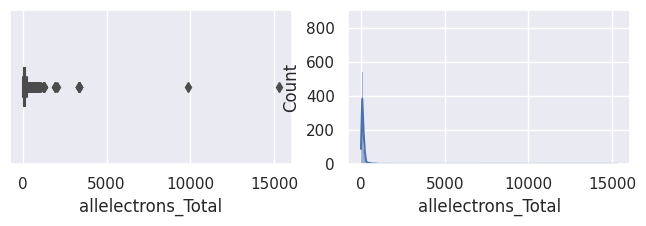

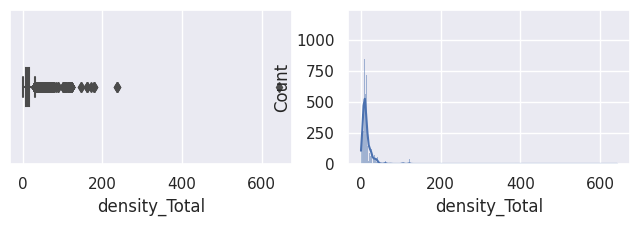

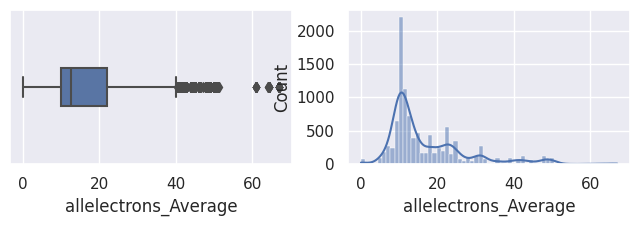

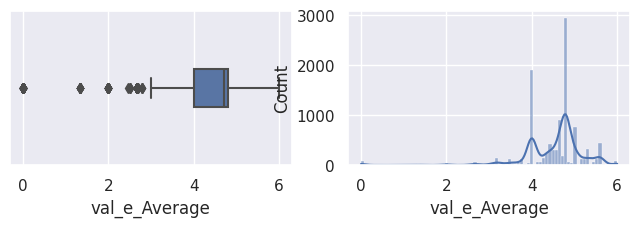

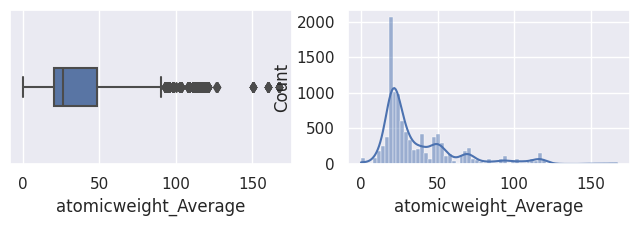

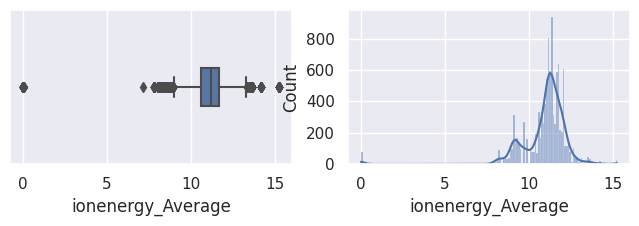

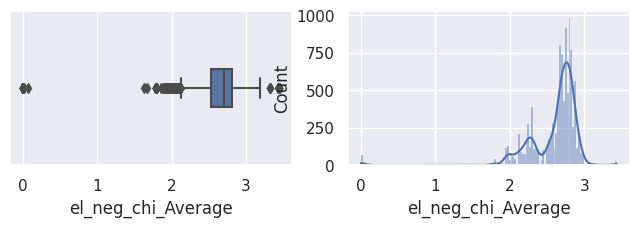

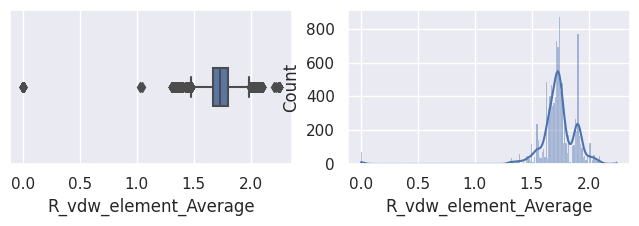

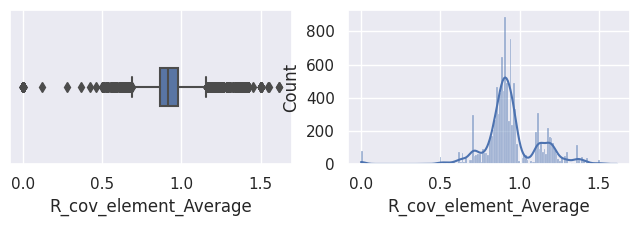

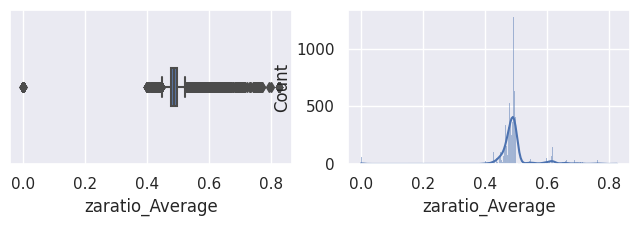

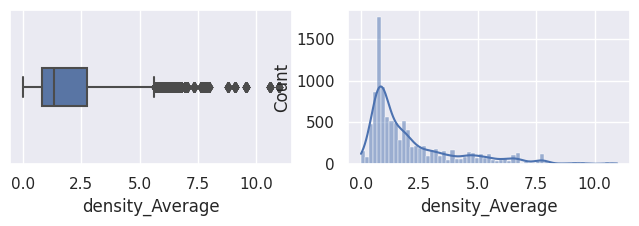

In [14]:
plot_distributions_quanti(df[quanti_var])

/home/ab2/.cache/pypoetry/virtualenvs/kaggle-competitions-qudAJOav-py3.10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


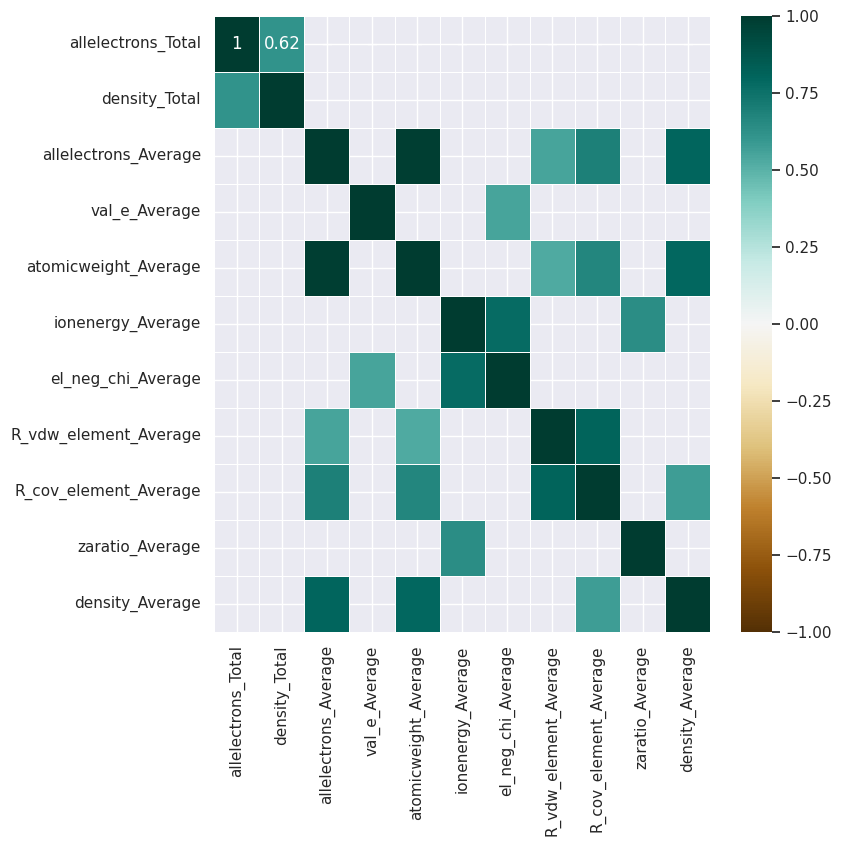

In [15]:
plot_correlation_matrix(df[quanti_var])

### Valeurs manquantes

In [ ]:
plot_na_quanti(df[quanti_var])

There are no missing values.


## Variables qualitatives

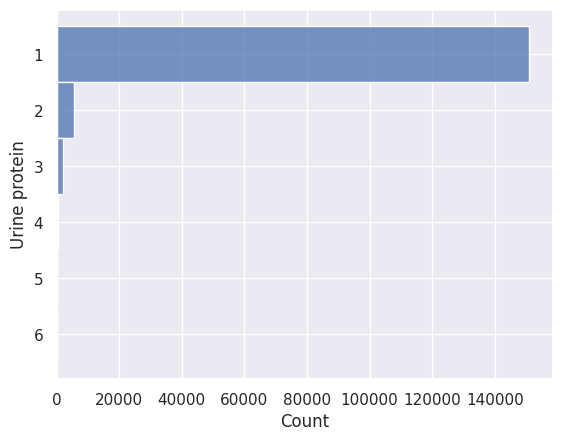

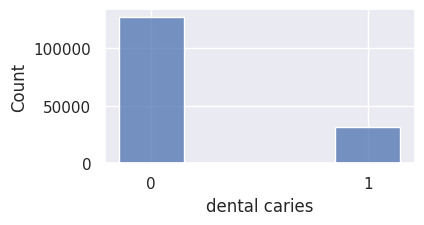

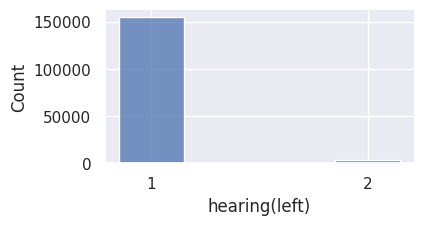

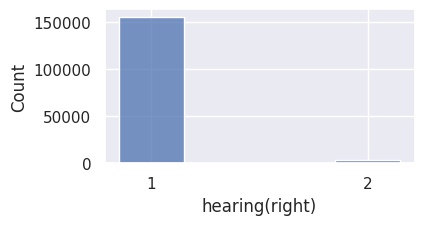

In [ ]:
plot_distributions_quali(df[quali_var])

### Valeurs manquantes

In [ ]:
df_na = df[quali_var].isna()
df_na_sum = df_na.sum()

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='id'>

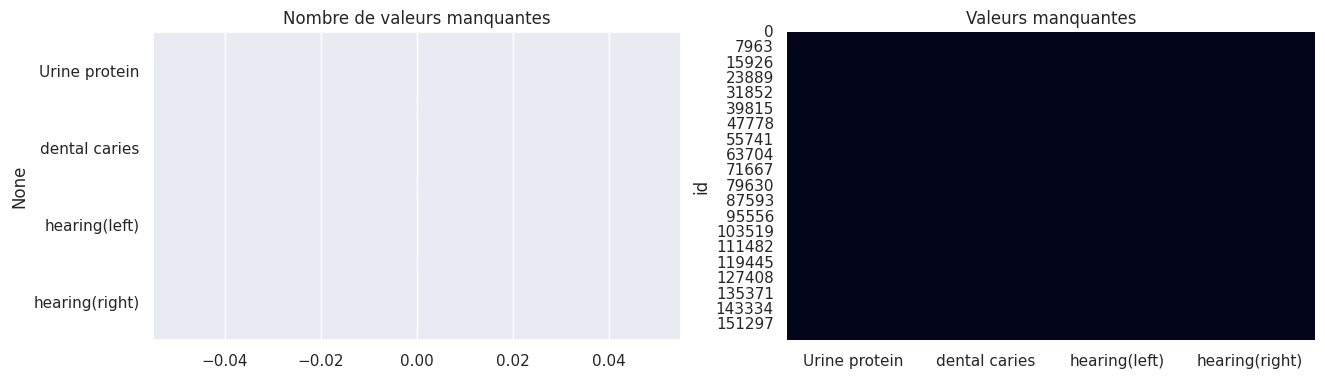

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs manquantes")
sns.barplot(x=df_na_sum.values, y=df_na_sum.index, color="C0", ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df_na, cbar=False, ax=ax[1])

In [ ]:
df_na_sum  # fixme: na are not detected because categories are converted as string I guess?

Urine protein     0
dental caries     0
hearing(left)     0
hearing(right)    0
dtype: int64

### Variable cible

In [11]:
y = df[target]

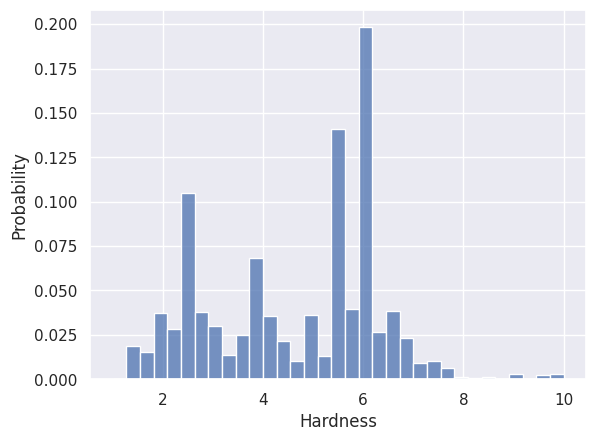

In [14]:
sns.histplot(y, stat="probability")
plt.show()

In [ ]:
pd.concat((y.value_counts(), y.value_counts(normalize=True)), axis=1)

,smoking,smoking
0,89603,0.562635
1,69653,0.437365


## Variable cible en fonction des autres variables

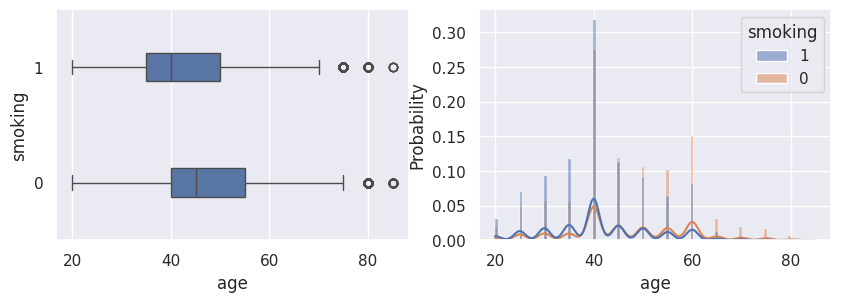

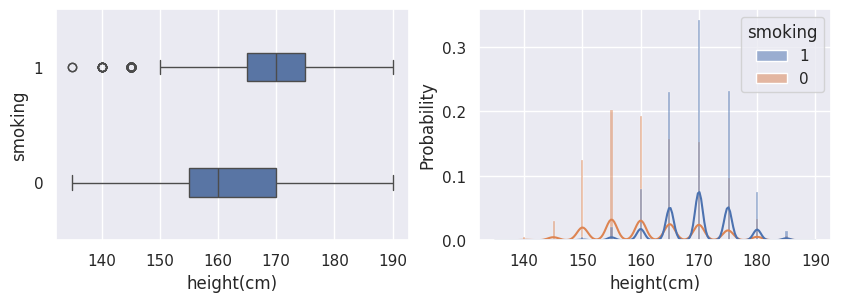

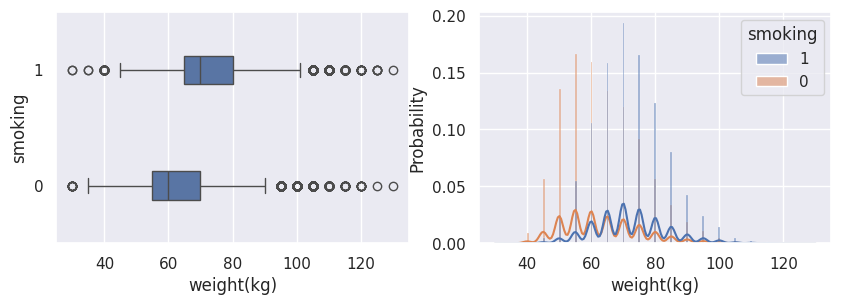

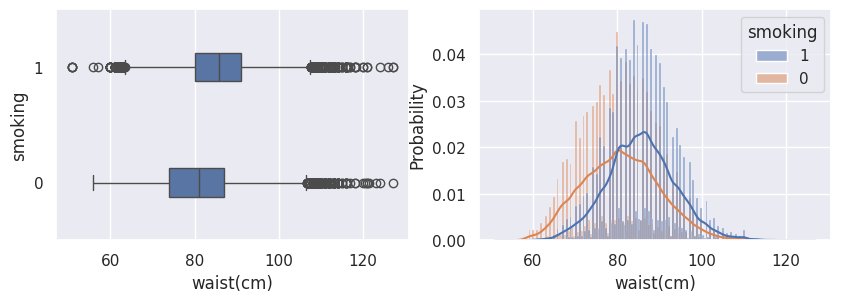

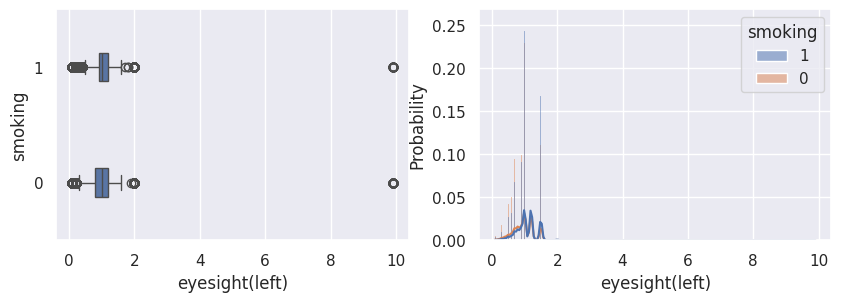

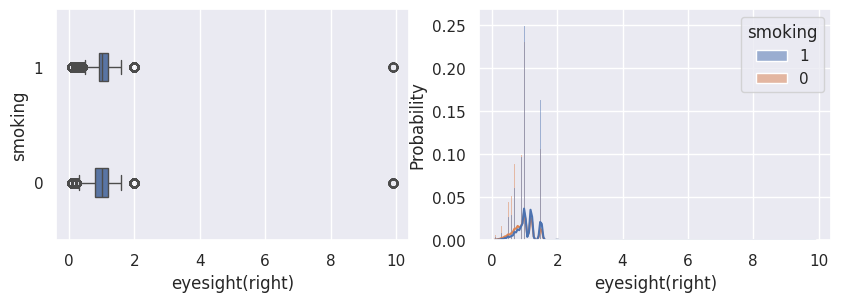

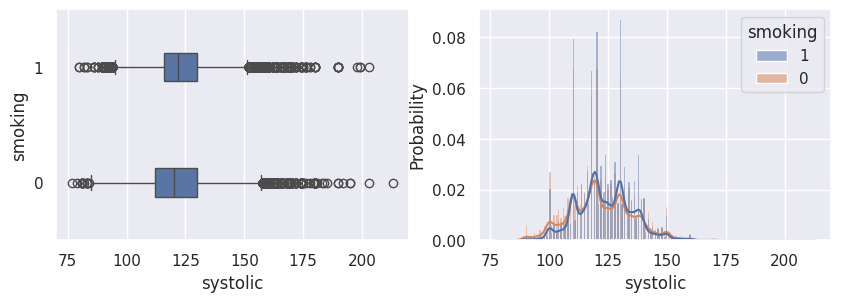

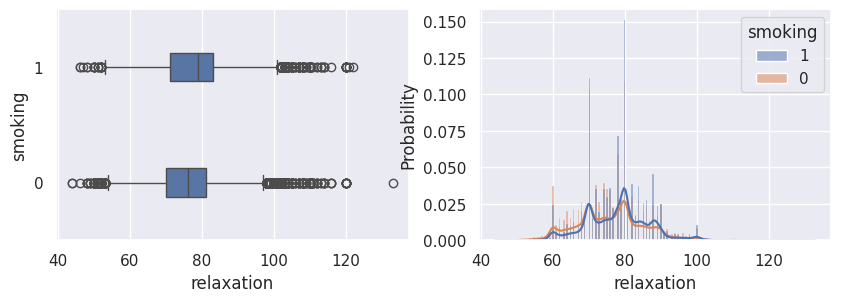

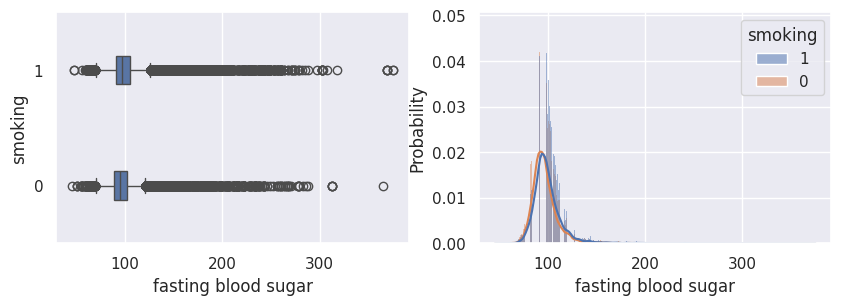

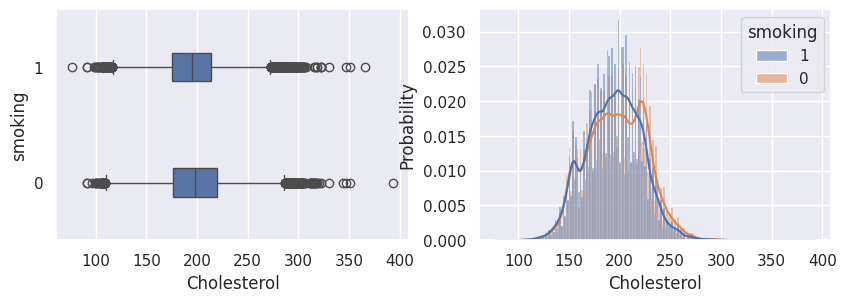

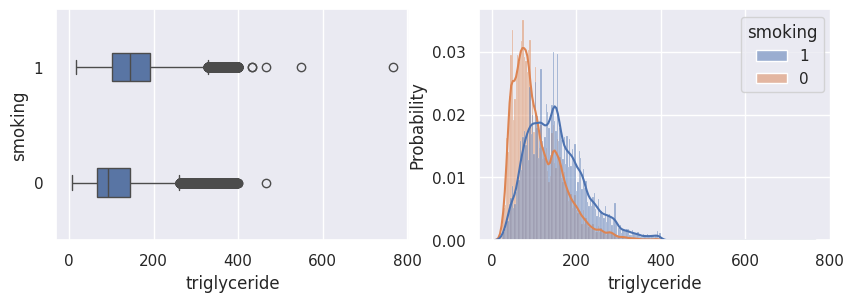

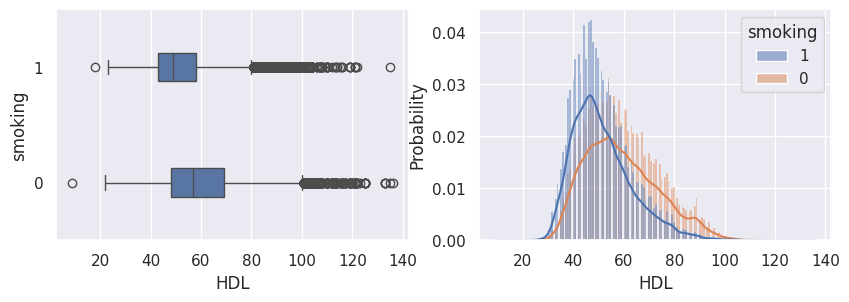

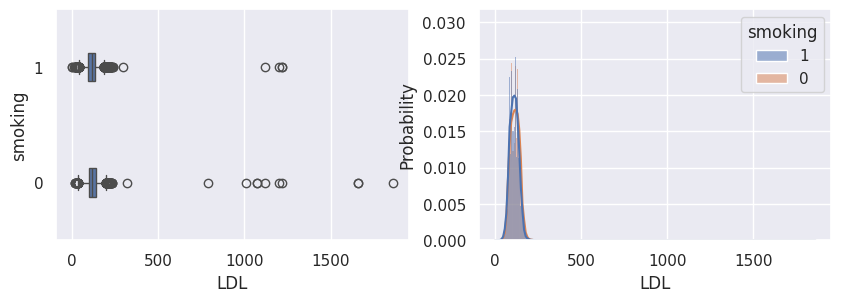

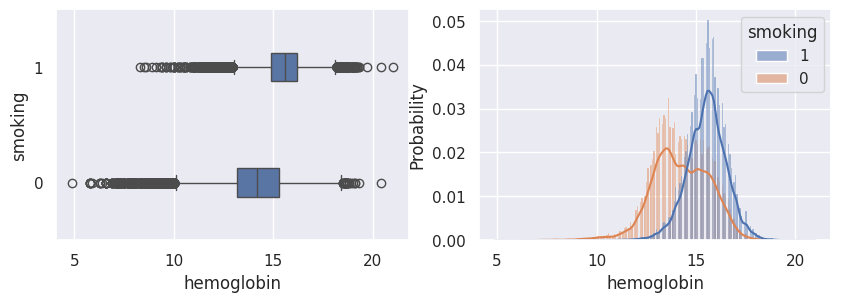

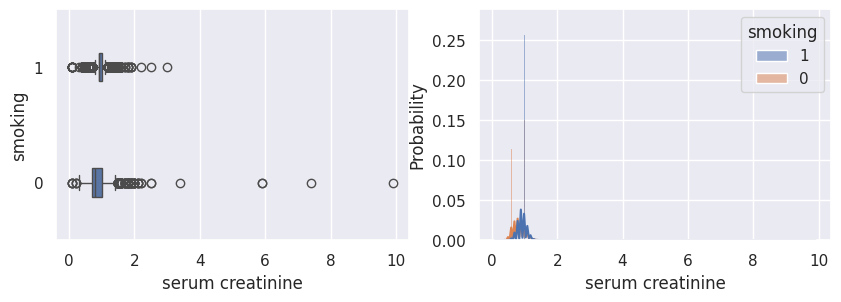

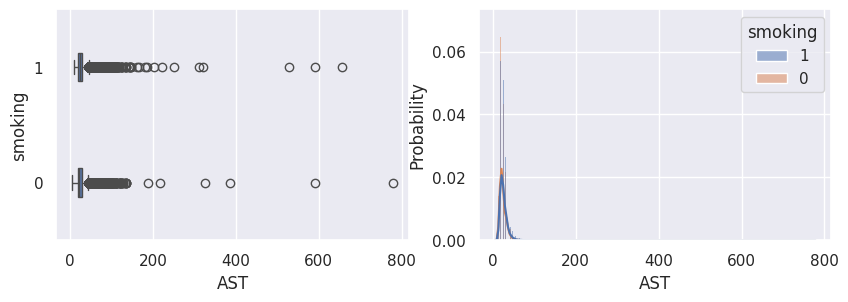

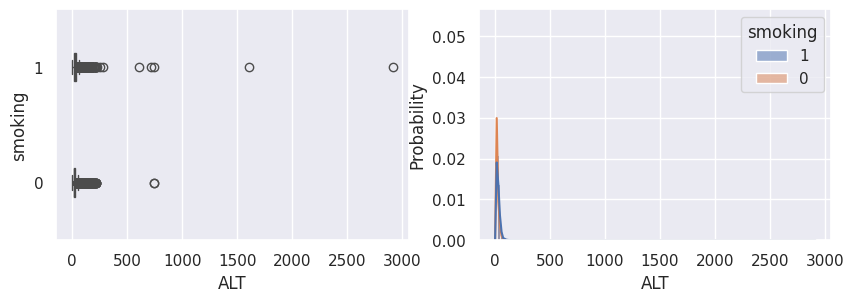

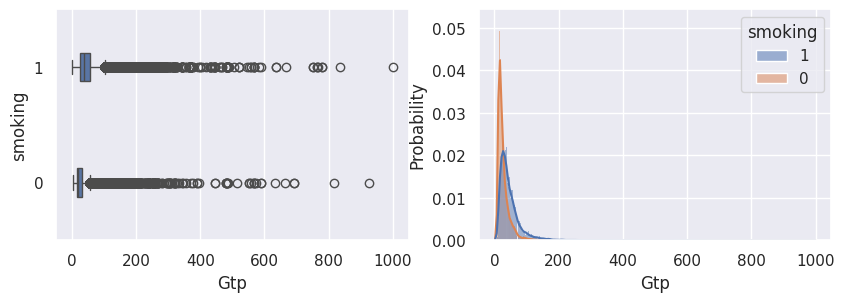

In [ ]:
for var in quanti_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.boxplot(df, x=df[var], y=target_as_str, width=0.25, ax=ax[0])

    sns.histplot(
        df,
        x=df[var],
        kde=True,
        ax=ax[1],
        hue=target_as_str,
        stat="probability",
        common_norm=False,
    )

    plt.show()

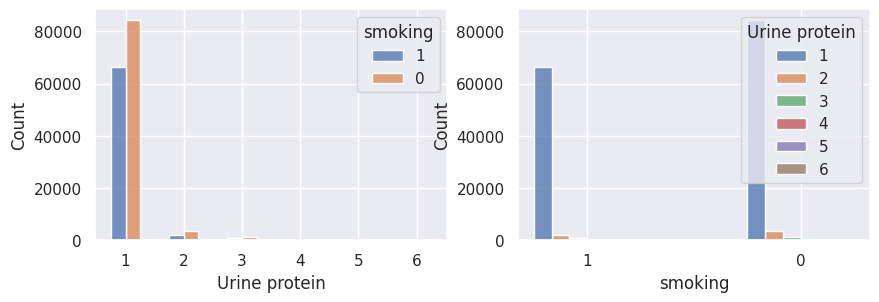

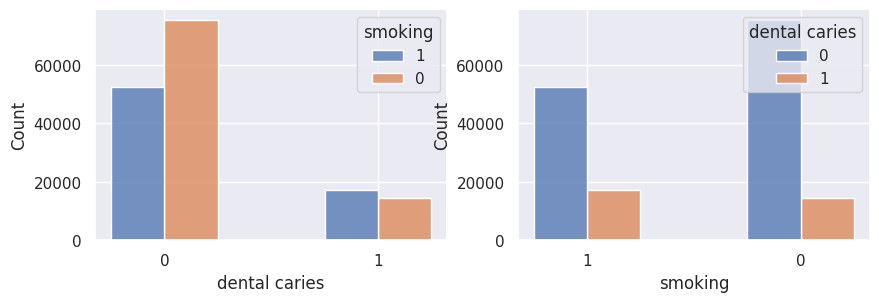

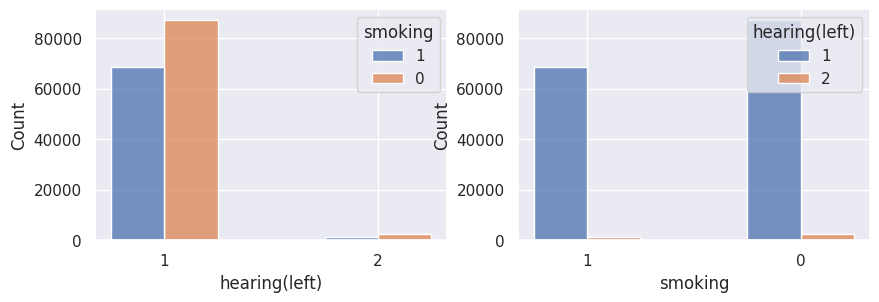

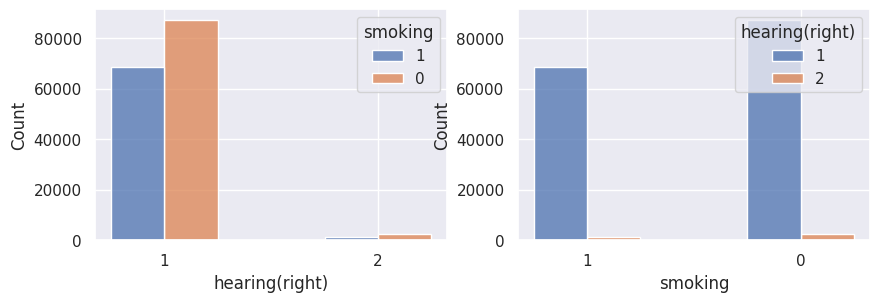

In [ ]:
for var in quali_var:
    _, ax = plt.subplots(1, 2, figsize=(10, 3))

    sns.histplot(
        df,
        x=df[var],
        hue=target_as_str,
        multiple="dodge",
        shrink=0.5,
        ax=ax[0],
    )

    sns.histplot(
        df,
        hue=df[var],
        x=target_as_str,
        multiple="dodge",
        shrink=0.5,
        ax=ax[1],
    )

    plt.show()

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/dataset/processed/train.csv")